In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Imports de todos os excel

In [182]:
patentes = pd.read_excel('../patentes/patentes.xlsx',sheet_name = 'Sheet1')
# patentes = pd.read_excel('../patentes-new/patentes.xlsx') 

In [183]:
marcas = pd.read_excel('../patentes/marca.xlsx',sheet_name = 'Sheet1')
# marcas = pd.read_excel('../patentes-new/marcas.xlsx')

In [184]:
software = pd.read_excel('../patentes/software.xlsx',sheet_name = 'Sheet1') 
# software = pd.read_excel('../patentes-new/software.xlsx') 

In [185]:
desenho = pd.read_excel('../patentes/desenho.xlsx',sheet_name = 'Sheet1') 
# desenho = pd.read_excel('../patentes-new/desenhos.xlsx') 

In [186]:
topografia = pd.read_excel('../patentes/topografia.xlsx',sheet_name = 'Sheet1')
# topografia = pd.read_excel('../patentes-new/topografia.xlsx')

In [187]:
cultivar_registrada = pd.read_excel('../patentes/cultivar_registrada.xlsx',sheet_name = 'Sheet1') 
# cultivar_registrada = pd.read_excel('../patentes-new/cultivar-registrada.xlsx')

In [188]:
cultivar_protegida = pd.read_excel('../patentes/cultivar_protegida.xlsx',sheet_name = 'Sheet1') 
# cultivar_protegida = pd.read_excel('../patentes-new/cultivar-protegida.xlsx')

## Passo 1: Análise geral das tabelas

Para que possa realizar a junção em uma única tabela

### Patentes

In [189]:
patentes.head()

,id_lattes,respondeu,inct,grupo_tematico,membro_status,nome_completo,id_patente,titulo_patente,ano_desenvolvimento,pais,...,palavra_chave_5,palavra_chave_6,setor_de_atividade_1,setor_de_atividade_2,setor_de_atividade_3,descricao_info_adicionais,nome_completo_autores,nome_citacao_autores,ordem_autoria_autores,id_autores
1,21199964477362,False,INCT de Catálise em Sistemas Moleculares e Nan...,Nanotecnologia,NaN,Bruno Szpoganicz,BR1020160063345,Nanopartículas superparamagnéticas (NPMs) de F...,2016,Brasil,...,NaN,NaN,Atividades de atenção à saúde humana,NaN,NaN,Nanopartículas superparamagnéticas (NPMs) de F...,"ZOTTIS, ALEXANDRE D´AGOSTINI; Luiciano R. S. L...","ZOTTIS, ALEXANDRE D´AGOSTINI; LARA, L. R. S.; ...",1; 10; 11; 2; 3; 4; 5; 6; 7; 8; 9,VAZIO; VAZIO; VAZIO; VAZIO; VAZIO; VAZIO; 5839...
2,21199964477362,False,INCT de Catálise em Sistemas Moleculares e Nan...,Nanotecnologia,NaN,Bruno Szpoganicz,BR10201601548,NANOPARTÍCULAS SUPERPARAMAGNÉTICAS DE FE3O4 RE...,2016,Brasil,...,NaN,NaN,Atividades de atenção à saúde humana,NaN,NaN,NANOPARTÍCULAS SUPERPARAMAGNÉTICAS DE FE3O4 RE...,"ZOTTIS, ALEXANDRE D´AGOSTINI; Luiciano R. S. L...","ZOTTIS, ALEXANDRE D´AGOSTINI; LARA, L. R. S.; ...",1; 10; 11; 2; 3; 4; 5; 6; 7; 8; 9; 1; 2; 3; 4;...,VAZIO; VAZIO; VAZIO; VAZIO; VAZIO; VAZIO; 5839...
3,22988322449627,True,INCT de Ciencias dos Materiais em Nanotecnologia,Nanotecnologia,NaN,Antonio Eduardo Martinelli,PI1002937,PROCESSO PARA TRATAMENTO DE ÁGUAS CONTAMINADAS...,2010,Brasil,...,NaN,NaN,NaN,NaN,NaN,PROCESSO PARA TRATAMENTO DE ÁGUAS CONTAMINADAS...,Gaspar Gonzalez Maldonado; Marcus Antonio de F...,"MALDONADO, Gaspar Gonzalez; MELO, Marcus Anton...",1; 2; 3; 4; 1; 2; 3; 4; 5; 6; 1; 2; 3; 4; 1; 2...,VAZIO; VAZIO; 5840621182000517; 33188717161115...
4,22988322449627,True,INCT de Ciencias dos Materiais em Nanotecnologia,Nanotecnologia,NaN,Antonio Eduardo Martinelli,PI11030968,FORMULAÇÕES DE MASSA CERÂMICA PARA REVESTIMENT...,2011,Brasil,...,NaN,NaN,NaN,NaN,NaN,A patente de invenção diz respeito ao uso de t...,Gaspar Gonzalez Maldonado; Marcus Antonio de F...,"MALDONADO, Gaspar Gonzalez; MELO, Marcus Anton...",1; 2; 3; 4; 1; 2; 3; 4; 5; 6; 1; 2; 3; 4; 1; 2...,VAZIO; VAZIO; 5840621182000517; 33188717161115...
5,22988322449627,True,INCT de Ciencias dos Materiais em Nanotecnologia,Nanotecnologia,NaN,Antonio Eduardo Martinelli,PI06005438A2,PASTA CIMENTANTE GEOPOLIMERIZADA E MÉTODO DE P...,2006,Brasil,...,NaN,NaN,NaN,NaN,NaN,NaN,Gaspar Gonzalez Maldonado; Marcus Antonio de F...,"MALDONADO, Gaspar Gonzalez; MELO, Marcus Anton...",1; 2; 3; 4; 1; 2; 3; 4; 5; 6; 1; 2; 3; 4; 1; 2...,VAZIO; VAZIO; 5840621182000517; 33188717161115...


In [190]:
patentes.columns

Index(['id_lattes', 'respondeu', 'inct', 'grupo_tematico', 'membro_status',
       'nome_completo', 'id_patente', 'titulo_patente', 'ano_desenvolvimento',
       'pais', 'meio_de_divulgacao', 'flag_relevancia',
       'flag_potencial_inovacao', 'finalidade', 'instituicao_financiadora',
       'categoria', 'tipo_patente', 'titulo_patente_reg',
       'data_pedido_de_deposito', 'data_pedido_de_exame', 'data_de_concessao',
       'instituicao_deposito_registro', 'numero_deposito_pct',
       'formato_data_deposito_pct', 'data_deposito_pct', 'nome_titular',
       'nome_depositante', 'sta_validacao', 'descricao_situacao',
       'data_situacao', 'status_situacao', 'palavra_chave_1',
       'palavra_chave_2', 'palavra_chave_3', 'palavra_chave_4',
       'palavra_chave_5', 'palavra_chave_6', 'setor_de_atividade_1',
       'setor_de_atividade_2', 'setor_de_atividade_3',
       'descricao_info_adicionais', 'nome_completo_autores',
       'nome_citacao_autores', 'ordem_autoria_autores', 'id_aut

In [191]:
patentes['tipo']='Patente'

In [192]:
df_pat = patentes[['id_lattes','respondeu', 'inct','grupo_tematico','ano_desenvolvimento', 'pais','flag_relevancia','flag_potencial_inovacao','instituicao_deposito_registro','instituicao_financiadora','id_patente','tipo']].copy()

### Marcas

In [193]:
marcas.columns

Index(['id_lattes', 'respondeu', 'inct', 'grupo_tematico', 'membro_status',
       'nome_completo', 'id_patente', 'titulo_marca', 'ano_desenvolvimento',
       'pais', 'flag_relevancia', 'titulo_ingles', 'flag_potencial_inovacao',
       'finalidade', 'finalidade_ingles', 'natureza', 'tipo_patente',
       'titulo_patente_reg', 'data_pedido_de_deposito', 'data_pedido_de_exame',
       'data_de_concessao', 'instituicao_deposito_registro',
       'numero_deposito_pct', 'formato_data_deposito_pct', 'data_deposito_pct',
       'nome_titular', 'nome_depositante', 'sta_validacao',
       'nome_grande_area_do_conhecimento', 'nome_da_area_do_conhecimento',
       'nome_da_sub_area_do_conhecimento', 'nome_da_especialidade',
       'palavra_chave_1', 'palavra_chave_2', 'palavra_chave_3',
       'palavra_chave_4', 'palavra_chave_5', 'palavra_chave_6',
       'setor_de_atividade_1', 'setor_de_atividade_2', 'setor_de_atividade_3',
       'nome_completo_autores', 'nome_citacao_autores',
       'orde

In [194]:
marcas['tipo']='Marca'
marcas['instituicao_financiadora'] = 'Não possui'#np.NaN

In [195]:
df_marcas = marcas[['id_lattes','respondeu','inct','grupo_tematico','ano_desenvolvimento','pais','flag_relevancia','flag_potencial_inovacao','instituicao_deposito_registro','instituicao_financiadora','id_patente','tipo']].copy()

### Software

In [196]:
software.columns

Index(['id_lattes', 'respondeu', 'inct', 'grupo_tematico', 'membro_status',
       'nome_completo', 'id_patente', 'titulo_software', 'ano_desenvolvimento',
       'pais', 'idioma', 'flag_relevancia', 'doi', 'meio_de_divulgacao',
       'titulo_ingles', 'flag_potencial_inovacao',
       'flag_divulgacao_cientifica', 'plataforma', 'disponibilidade',
       'finalidade', 'finalidade_ingles', 'ambiente',
       'instituicao_financiadora', 'tipo_patente', 'titulo_patente_reg',
       'data_pedido_de_deposito', 'data_pedido_de_exame', 'data_de_concessao',
       'instituicao_deposito_registro', 'numero_deposito_pct',
       'formato_data_deposito_pct', 'data_deposito_pct', 'nome_titular',
       'nome_depositante', 'sta_validacao', 'nome_grande_area_do_conhecimento',
       'nome_da_area_do_conhecimento', 'nome_da_sub_area_do_conhecimento',
       'nome_da_especialidade', 'palavra_chave_1', 'palavra_chave_2',
       'palavra_chave_3', 'palavra_chave_4', 'palavra_chave_5',
       'palavra_cha

In [197]:
software['tipo']='Software'

In [198]:
df_sof = software[['id_lattes','respondeu','inct','grupo_tematico','ano_desenvolvimento','pais','flag_relevancia','flag_potencial_inovacao','instituicao_deposito_registro','instituicao_financiadora','id_patente','tipo']].copy()

### Desenho

In [199]:
desenho.columns

Index(['id_lattes', 'respondeu', 'inct', 'grupo_tematico', 'membro_status',
       'nome_completo', 'id_patente', 'titulo_marca', 'ano_desenvolvimento',
       'pais', 'flag_relevancia', 'titulo_ingles', 'flag_potencial_inovacao',
       'finalidade', 'instituicao_financiadora', 'finalidade_ingles',
       'tipo_patente', 'titulo_patente_reg', 'data_pedido_de_deposito',
       'data_pedido_de_exame', 'data_de_concessao',
       'instituicao_deposito_registro', 'numero_deposito_pct',
       'formato_data_deposito_pct', 'data_deposito_pct', 'nome_titular',
       'nome_depositante', 'nome_grande_area_do_conhecimento',
       'nome_da_area_do_conhecimento', 'nome_da_sub_area_do_conhecimento',
       'nome_da_especialidade', 'nome_completo_autores',
       'nome_citacao_autores', 'ordem_autoria_autores', 'id_autores'],
      dtype='object')

In [200]:
desenho['tipo'] = 'Desenho'

In [201]:
df_desenho = desenho[['id_lattes','respondeu','inct','grupo_tematico','ano_desenvolvimento','pais','flag_relevancia','flag_potencial_inovacao','instituicao_deposito_registro','instituicao_financiadora','id_patente','tipo']].copy()

### Topografia

In [202]:
topografia.columns

Index(['id_lattes', 'respondeu', 'inct', 'grupo_tematico', 'membro_status',
       'nome_completo', 'id_patente', 'titulo_topografia',
       'ano_desenvolvimento', 'pais', 'flag_relevancia', 'titulo_ingles',
       'flag_potencial_inovacao', 'finalidade', 'instituicao_financiadora',
       'finalidade_ingles', 'tipo_patente', 'titulo_patente_reg',
       'data_pedido_de_deposito', 'data_pedido_de_exame', 'data_de_concessao',
       'instituicao_deposito_registro', 'numero_deposito_pct',
       'formato_data_deposito_pct', 'data_deposito_pct', 'nome_titular',
       'nome_depositante', 'sta_validacao', 'descricao_info_adicionais',
       'nome_completo_autores', 'nome_citacao_autores',
       'ordem_autoria_autores', 'id_autores'],
      dtype='object')

In [203]:
topografia['tipo']='Topografia'

In [204]:
df_topografia = topografia[['id_lattes','respondeu','inct','grupo_tematico','ano_desenvolvimento','pais','flag_relevancia','flag_potencial_inovacao','instituicao_deposito_registro','instituicao_financiadora','id_patente','tipo']].copy()

### Cultivar Registrada

In [205]:
cultivar_registrada.columns

Index(['id_lattes', 'respondeu', 'inct', 'grupo_tematico', 'membro_status',
       'nome_completo', 'id_patente', 'denominacao', 'ano_solicitacao', 'pais',
       'flag_relevancia', 'denominacao_ingles', 'flag_potencial_inovacao',
       'finalidade', 'instituicao_financiadora', 'finalidade_ingles',
       'titulo_patente_reg', 'data_pedido_de_deposito', 'data_pedido_de_exame',
       'data_de_concessao', 'instituicao_deposito_registro',
       'numero_deposito_pct', 'formato_data_deposito_pct', 'data_deposito_pct',
       'nome_titular', 'nome_depositante', 'sta_validacao',
       'nome_grande_area_do_conhecimento_1', 'nome_da_area_do_conhecimento_1',
       'nome_da_sub_area_do_conhecimento_1', 'nome_da_especialidade_1',
       'nome_grande_area_do_conhecimento_2', 'nome_da_area_do_conhecimento_2',
       'nome_da_sub_area_do_conhecimento_2', 'nome_da_especialidade_2',
       'setor_de_atividade_1', 'setor_de_atividade_2', 'setor_de_atividade_3',
       'nome_completo_autores', 'nome

In [206]:
cultivar_registrada.rename(columns={'ano_solicitacao': 'ano_desenvolvimento'}, inplace=True)

In [207]:
cultivar_registrada['tipo'] = 'Cultivar Registrada'

In [208]:
df_cultivar_registrada = cultivar_registrada[['id_lattes','respondeu','inct','grupo_tematico','ano_desenvolvimento','pais','flag_relevancia','flag_potencial_inovacao','instituicao_deposito_registro','instituicao_financiadora','id_patente','tipo']].copy()

### Cultivar Protegida

In [209]:
cultivar_protegida.columns

Index(['id_lattes', 'respondeu', 'inct', 'grupo_tematico', 'membro_status',
       'nome_completo', 'id_patente', 'denominacao', 'ano_solicitacao', 'pais',
       'flag_relevancia', 'denominacao_ingles', 'flag_potencial_inovacao',
       'finalidade', 'instituicao_financiadora', 'finalidade_ingles',
       'titulo_patente_reg', 'data_pedido_de_deposito', 'data_pedido_de_exame',
       'data_de_concessao', 'instituicao_deposito_registro',
       'numero_deposito_pct', 'formato_data_deposito_pct', 'data_deposito_pct',
       'nome_titular', 'nome_depositante', 'sta_validacao',
       'nome_grande_area_do_conhecimento_1', 'nome_da_area_do_conhecimento_1',
       'nome_da_sub_area_do_conhecimento_1', 'nome_da_especialidade_1',
       'nome_grande_area_do_conhecimento_2', 'nome_da_area_do_conhecimento_2',
       'nome_da_sub_area_do_conhecimento_2', 'nome_da_especialidade_2',
       'setor_de_atividade_1', 'setor_de_atividade_2', 'setor_de_atividade_3',
       'nome_completo_autores', 'nome

In [210]:
cultivar_protegida.rename(columns={'ano_solicitacao': 'ano_desenvolvimento'}, inplace=True)

In [211]:
cultivar_protegida['tipo'] = 'Cultivar Protegida'

In [212]:
df_cultivar_protegida = cultivar_protegida[['id_lattes','respondeu','inct','grupo_tematico','ano_desenvolvimento','pais','flag_relevancia','flag_potencial_inovacao','instituicao_deposito_registro','instituicao_financiadora','id_patente','tipo']]

## Passo 2: Concatenar todas as tabelas

In [213]:
frames = [df_pat, df_marcas, df_desenho, df_sof, df_topografia, df_cultivar_registrada, df_cultivar_protegida] 

result = pd.concat(frames)

In [214]:
len(result)

10310

### Retira os espaço do início da string

In [215]:
result['inct'] = result.inct.str.lstrip()
# para retirar do final pode usar rstrip()

In [216]:
result.loc[result.inct == 'INCT de Óleo e Gás'].head(3)

,id_lattes,respondeu,inct,grupo_tematico,ano_desenvolvimento,pais,flag_relevancia,flag_potencial_inovacao,instituicao_deposito_registro,instituicao_financiadora,id_patente,tipo
735,1138639549823932,True,INCT de Óleo e Gás,Energia,2001.0,Brasil,SIM,NAO,NaN,Petrobras,PI96027452,Patente
3002,5408802153017996,True,INCT de Óleo e Gás,Energia,2009.0,Brasil,NAO,SIM,INPI - Instituto Nacional da Propriedade Indus...,PETROBRAS,PI09048847,Patente
385,630189208238912,True,INCT de Óleo e Gás,Energia,2005.0,Brasil,NAO,NAO,NaN,NaN,NaN,Software


## Passo 3: Análise exploratórioa

Verifica a quantidade de produção de patentes e seus tipos

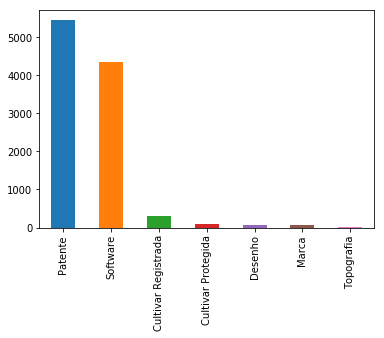

In [217]:
result.tipo.value_counts().plot.bar()

### Instituição depósito de registro

In [222]:
result['instituicao_deposito_registro_tratada'] = map(lambda x: x.lower(), result['instituicao_deposito_registro'])

In [218]:
df=result['instituicao_deposito_registro'] 
newdf=df.str.lower()

In [220]:
newdf.value_counts()

inpi - instituto nacional da propriedade industrial                     3355
united states patent and trademark office                                279
wipo - world intellectual property organization                          164
ministério da agricultura, pecuária e abastecimento                      118
ministério da agricultura, pecuária e abastecimento (mapa)                62
ministério da agricultura, pecuária e abastecimento - mapa                50
ioc / biomanguinhos                                                       34
european patent office                                                    33
japanese patent office                                                    27
universidade federal de minas gerais                                      24
ministério da agricultura                                                 19
uk patent office                                                          16
canadian intellectual property office                                     13

In [175]:
result.instituicao_deposito_registro.value_counts()

In [171]:
len(result[result['instituicao_deposito_registro'].str.contains("Ministério da Agricultura, Pecuária e Abastecimento")==True])

229

### Instituição financiadora

In [168]:
result.instituicao_financiadora.value_counts()[:10]

FAPESP                                               101
CNPq                                                  90
Não possui                                            61
Texas Instruments Incorporated  (Dallas, TX, EUA)     57
UFMG                                                  39
Embrapa Instrumentação Agropecuária                   37
FIOCRUZ                                               36
FAPEMIG                                               31
Fapesp                                                27
Unicamp                                               24
Name: instituicao_financiadora, dtype: int64

In [164]:
result.instituicao_financiadora.value_counts()

CNPQ = len(result[result['instituicao_financiadora'].str.contains("CNPQ")==True])
CNPq = len(result[result['instituicao_financiadora'].str.contains("CNPq")==True])
CNPQ, CNPq

(22, 390)

In [165]:
len(result.instituicao_financiadora)

10310

In [ ]:
possui_marcos_criticos = len(projetos.loc[~projetos.MarcosCriticosSuperadosRelativo.isna()])
p_possui_marcos_criticos =  possui_marcos_criticos/ len(projetos)
print ('Quantos projetos possuem marcos críticos: ' + str(possui_marcos_criticos))
print ('Porcentagem: ' + str(p_possui_marcos_criticos))

In [135]:
patente = result[result.tipo == 'Patente'].shape[0]
software = result[result.tipo == 'Software'].shape[0]
cultivar_reg = result[result.tipo == 'Cultivar Registrada'].shape[0]
cultivar_prot = result[result.tipo == 'Cultivar Protegida'].shape[0]
desenho = result[result.tipo == 'Desenho'].shape[0]
marca = result[result.tipo == 'Marca'].shape[0]
topografia = result[result.tipo == 'Topografia'].shape[0]

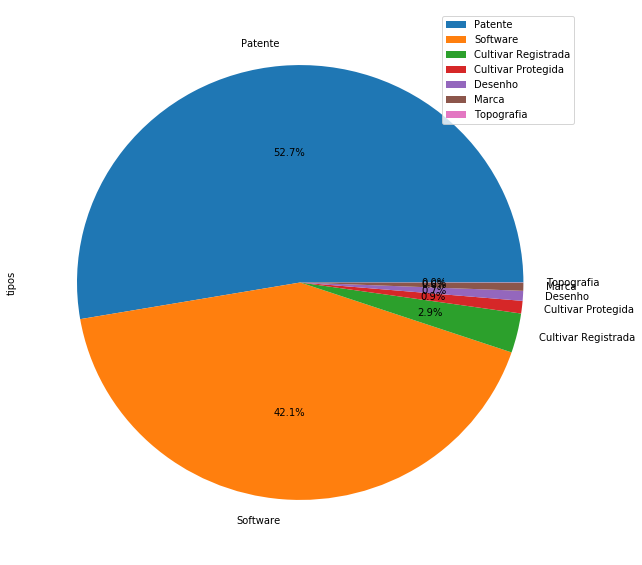

In [155]:
explode = (0.1, 0)
pd.DataFrame({'tipos': [patente,software,cultivar_reg,cultivar_prot,desenho,marca,topografia]},
              index=['Patente','Software','Cultivar Registrada','Cultivar Protegida','Desenho','Marca','Topografia']).plot.pie(y='tipos', autopct='%1.1f%%', figsize=(10, 10))
#plt.title('Projetos que possuem marcos críticos')

In [ ]:
explode = (0.1, 0)
pd.DataFrame({'projetos': [possui_marcos_criticos, len(projetos)-possui_marcos_criticos],
              'marcos': [p_possui_marcos_criticos,1-p_possui_marcos_criticos]},
              index=['Sim','Não']).plot.pie(y='marcos', explode=explode, autopct='%1.1f%%', figsize=(5, 5))
plt.title('Projetos que possuem marcos críticos')

In [146]:
result.tipo.sort_values().value_counts().index[2]

'Cultivar Registrada'

In [137]:
result[result.tipo == 'Patente'].shape[0]

5433

In [129]:
result.tipo.value_counts()

Patente                5433
Software               4340
Cultivar Registrada     302
Cultivar Protegida       96
Desenho                  76
Marca                    61
Topografia                2
Name: tipo, dtype: int64

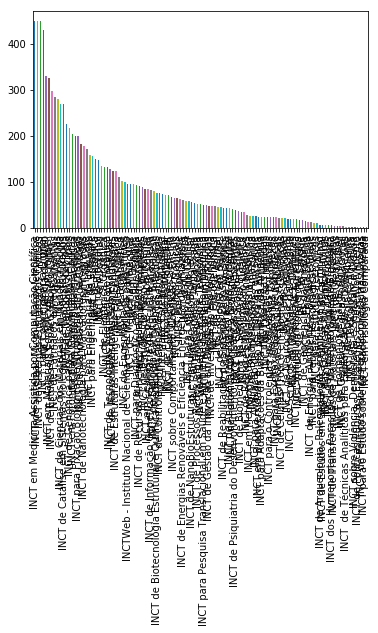

In [39]:
result.inct.value_counts().plot.bar()

In [40]:
len(result.id_lattes.unique())

2099

In [41]:
len(result)

10310

In [42]:
result.id_lattes.value_counts()

3252717320434089    135
9545152910170494     83
1061566045001511     78
6507131548554325     72
6191239140886028     67
569614713880200      64
1325247019367288     64
2828124381670231     63
7506578377321090     55
3919711591553904     52
5320044076881770     52
7748064810111389     51
6858139747014559     50
9500245604678806     47
9848311210578810     44
7508554632929520     43
7090419604571199     43
291695624884565      42
2365059843175411     40
7992694643607149     40
240551533292579      38
7313722167100200     36
7925449690046513     35
4947860249518663     34
8518698825437370     33
1043780332502091     33
9522788035526763     33
4542759243110371     33
3150074537946167     33
3163271519013006     32
                   ... 
8049184468038869      1
8796898263583929      1
2178533944807519      1
5472101509640211      1
5590258147022413      1
232075212409214       1
7014991384513854      1
1741899845739117      1
1029892667445223      1
9578804482562433      1
7304216246785522

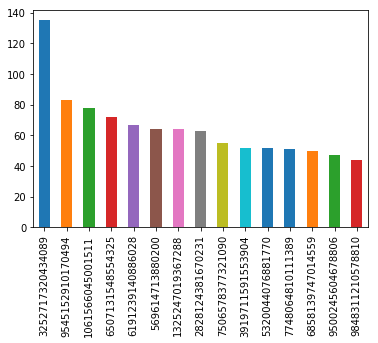

In [43]:
result.id_lattes.value_counts()[:15].plot.bar()

In [44]:
a = result.loc[result.id_lattes==1061566045001511]
a.tipo.unique()

array(['Patente', 'Software'], dtype=object)

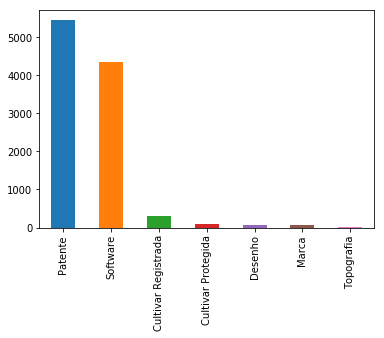

In [45]:
result.tipo.value_counts().plot.bar()

------------------------------------------------------------------

In [80]:
# patentes.columns

In [81]:
# patentes['tipo'] = 'Patente'

In [82]:
# patentes.rename(columns={'TIPO.PATENTE': 'TIPO_PATENTE', 'ANO.DESENVOLVIMENTO': 'ANO_DESENVOLVIMENTO'}, inplace=True)

In [83]:
# patentes.rename(columns={'FLAG.POTENCIAL.INOVACAO': 'FLAG_POTENCIAL_INOVACAO', 'ANO.DESENVOLVIMENTO': 'ANO_DESENVOLVIMENTO'}, inplace=True)

In [84]:
# patentes.TIPO_PATENTE.value_counts()


In [85]:
# df_patentes = patentes[['ID.LATTES','respondeu','inct','grupo_tematico','ANO.DESENVOLVIMENTO','PAIS','FLAG.POTENCIAL.INOVACAO','CODIGO.DO.REGISTRO.OU.PATENTE','tipo']].copy